<a href="https://colab.research.google.com/github/ShashwatVyas926/AER850_Project_3/blob/main/Project_3_Step_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

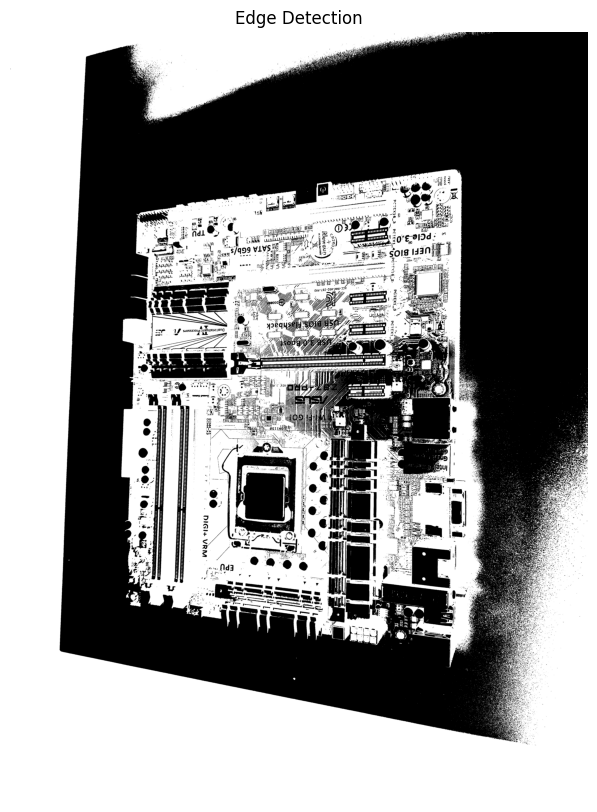

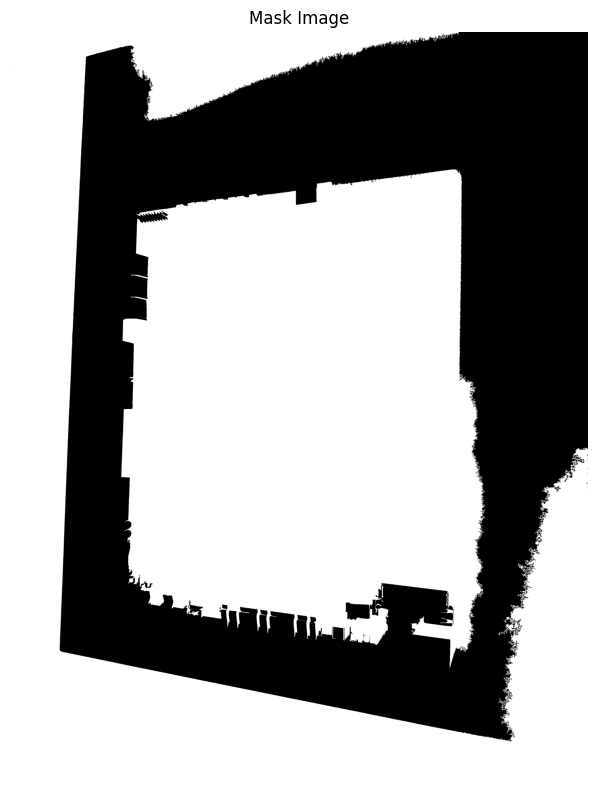

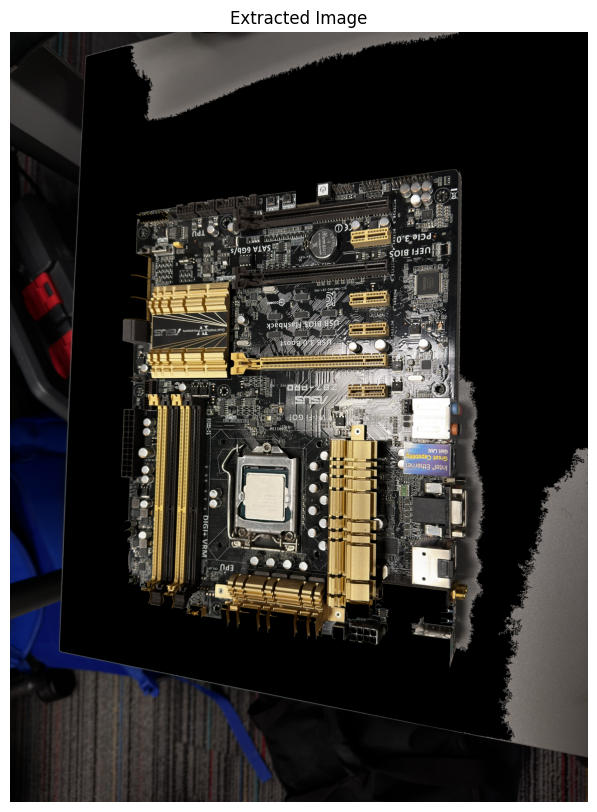

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = "drive/MyDrive/AER850_Project_3/motherboard_image.JPEG"
image = cv2.imread(image_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

binary_color = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

# Displaying edge detection
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(binary_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Edge Detection')
plt.show()

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 10000]

mask = np.zeros_like(gray)

cv2.drawContours(mask, filtered_contours, -1, (255), thickness=cv2.FILLED)

mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Displaying mask image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(mask_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Mask Image')
plt.show()

result = cv2.bitwise_and(image, image, mask=mask)

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Displaying final extracted motherboard
plt.figure(figsize=(10, 10))
plt.imshow(result_rgb)
plt.axis('off')
plt.title('Extracted Image')
plt.show()